In [3]:
res = -1.0:0.01:1.0
ims = -1.0:0.01:1.0

-1.0:0.01:1.0

In [4]:
vals = [r + 1.0im * i for r in res, i in ims];

In [5]:
size(vals)

(201, 201)

In [6]:
angs = angle.(vals);

In [7]:
using Plots

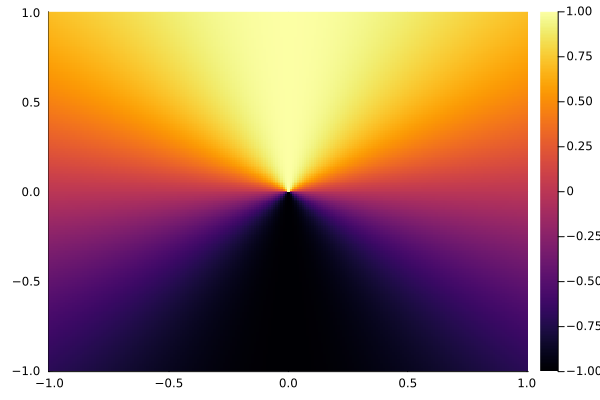

In [8]:
heatmap(res, ims, cos.(angs))

In [43]:
function soft_angle(x::Complex, r_lo::Real = 1e-2, r_hi::Real = 0.2)
    function kernel(x::Complex)
        r = abs(x)
        if r < r_lo
            return zero(real(x))
        elseif r > r_hi
            return one(real(x))
        else
            return (r - r_lo)/(r_hi - r_lo)
        end
    end

    return kernel(x) * angle(x)
end

soft_angle (generic function with 3 methods)

In [13]:
using Lux

In [ ]:
sigmoid

In [58]:
function kernel(x::AbstractArray{<:Complex},  r_lo::Real = 1e-2, r_hi::Real = 0.2)
    r = abs.(x)
    m = (r .- r_lo) ./ (r_hi - r_lo)
    y = sigmoid_fast(3 .* m .- (r_hi - r_lo)/2)
    return y
end

kernel (generic function with 3 methods)

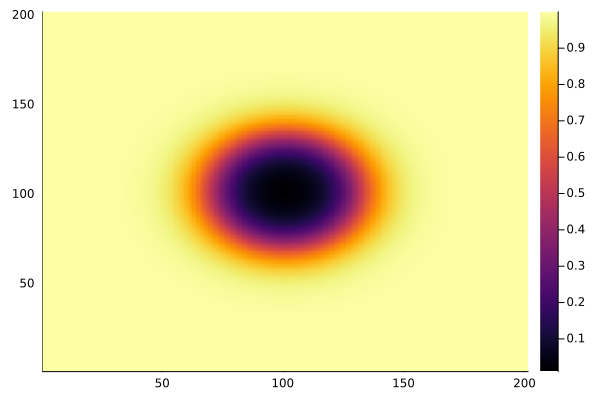

In [60]:
heatmap(kernel(vals, 0.3, 0.5))

In [71]:
function soft_angle(x::AbstractArray{<:Complex}, r_lo::Real = 0.1, r_hi::Real = 0.2)
    r = abs.(x)
    m = (r .- r_lo) ./ (r_hi - r_lo)
    s = sigmoid_fast(3 .* m .- (r_hi - r_lo))

    return s .* angle.(x) / pi
end

soft_angle (generic function with 3 methods)

In [72]:
s_angs = soft_angle(vals, 0.1, 0.2);

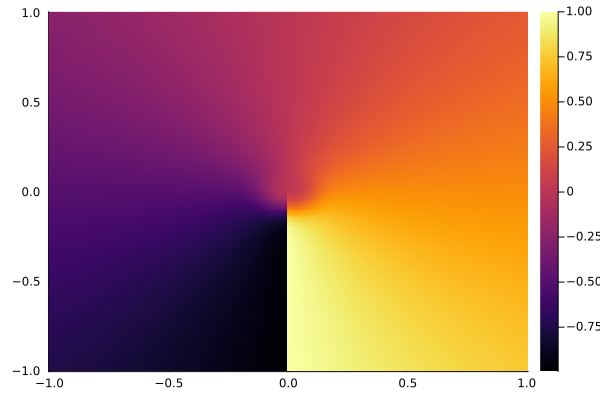

In [73]:
heatmap(res, ims, s_angs)

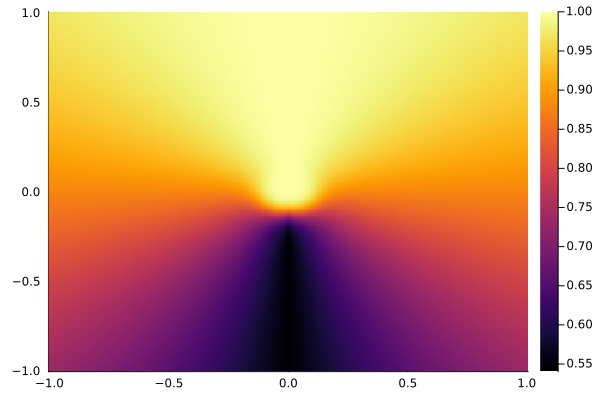

In [74]:
heatmap(res, ims, cos.(s_angs))

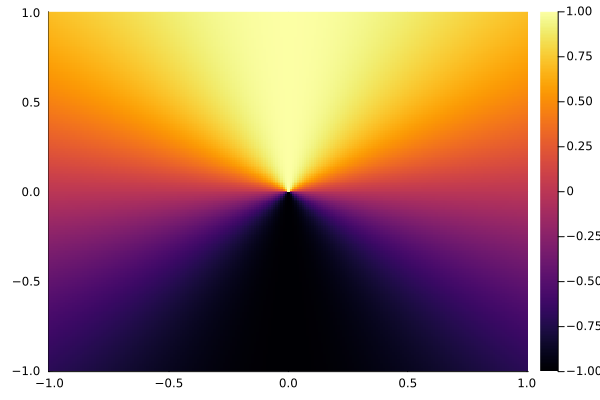

In [75]:
heatmap(res, ims, cos.(angs))